In [1]:
%pylab inline
from scipy.fftpack import fft,fftfreq

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Se importan los datos y se organizan en un histograma n*n para pasar de floats a enteros
x=genfromtxt('circulos.dat')
n=200
X=histogram2d(x[:,0],x[:,1],n)[0]
escala=1.0*(max(x[:,0])-min(x[:,0]))/n

1.55982138


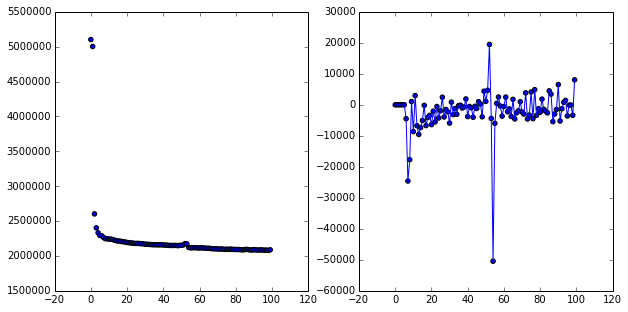

In [4]:
#Se calcula la funcion de autocorrelacio a partir de la transdormada inversa del cuadrado del valor absoluto de la transformada
rho2=abs(ifft2(abs(fft2(X))**2))
#Si se desea visualizar descomentar la siguente linea, se observan cuartos de circulo en cada esquina...
#matshow(log10(rho2),cmap="gray")

#La siguiente parte del codigo realiza sumas sobre circulos cada vez mas grandes para hallar el punto donde hay un cambio brusco
a=zeros(len(X)/2)
b=zeros(len(X)/2)

for i in range(len(X)/2):
    for theta in range(100):
        xx=int(i*cos(theta*2*pi/100))
        yy=int(i*sin(theta*2*pi/100))
        a[i]+=rho2[xx,yy]
    #Se calcula la derivada de a sin incluir el pico en numeros bajos
    if i>5:
        b[i]=a[i]-a[i-1]
#Se plotea para visualizar mejor
figure=figsize(10,5)
subplot(1,2,1)
scatter(arange(len(a)),a)
subplot(1,2,2)
plot(b)
scatter(arange(len(b)),b)
#Se ve claramente un pico correspondiente al diametro
diametro=escala*argmax(b)
print diametro